In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
df = pd.read_csv("/content/train.csv")
df.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [3]:
df.shape

(15120, 56)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

In [5]:
df["Cover_Type"].value_counts()

,count
Cover_Type,
5,2160
2,2160
1,2160
7,2160
3,2160
6,2160
4,2160


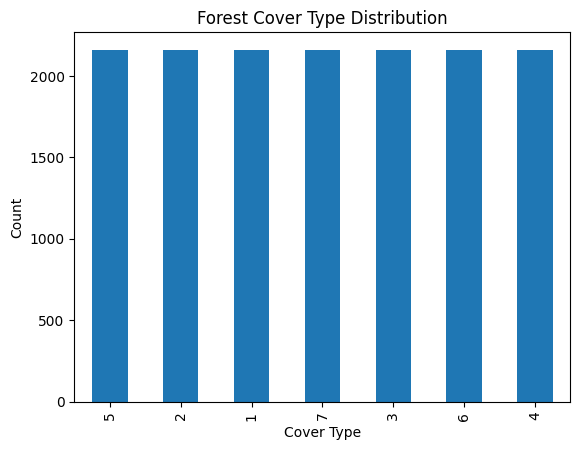

In [8]:
df["Cover_Type"].value_counts().plot(kind="bar")
plt.xlabel("Cover Type")
plt.ylabel("Count")
plt.title("Forest Cover Type Distribution")
plt.show()

In [9]:
X = df.drop("Cover_Type", axis=1)
y = df["Cover_Type"]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [11]:
model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

In [12]:
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42)

In [13]:
y_pred = model.predict(X_test)

In [15]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8792989417989417


In [16]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       0.79      0.78      0.79       421
           2       0.82      0.71      0.76       438
           3       0.87      0.85      0.86       428
           4       0.93      0.98      0.96       449
           5       0.90      0.95      0.92       416
           6       0.87      0.91      0.89       432
           7       0.96      0.97      0.97       440

    accuracy                           0.88      3024
   macro avg       0.88      0.88      0.88      3024
weighted avg       0.88      0.88      0.88      3024



In [17]:
confusion_matrix(y_test, y_pred)


array([[329,  59,   0,   0,  14,   0,  19],
       [ 77, 311,  15,   0,  27,   7,   1],
       [  0,   1, 363,  19,   2,  43,   0],
       [  0,   0,   5, 440,   0,   4,   0],
       [  1,   6,  10,   0, 396,   3,   0],
       [  0,   3,  23,  13,   2, 391,   0],
       [ 10,   1,   0,   0,   0,   0, 429]])

In [18]:
feature_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": model.feature_importances_
}).sort_values(by="Importance", ascending=False)

feature_importance_df.head(10)


,Feature,Importance
1,Elevation,0.211517
6,Horizontal_Distance_To_Roadways,0.083168
0,Id,0.080081
10,Horizontal_Distance_To_Fire_Points,0.063508
4,Horizontal_Distance_To_Hydrology,0.056326
5,Vertical_Distance_To_Hydrology,0.049089
14,Wilderness_Area4,0.047602
7,Hillshade_9am,0.047425
2,Aspect,0.045118
9,Hillshade_3pm,0.041376


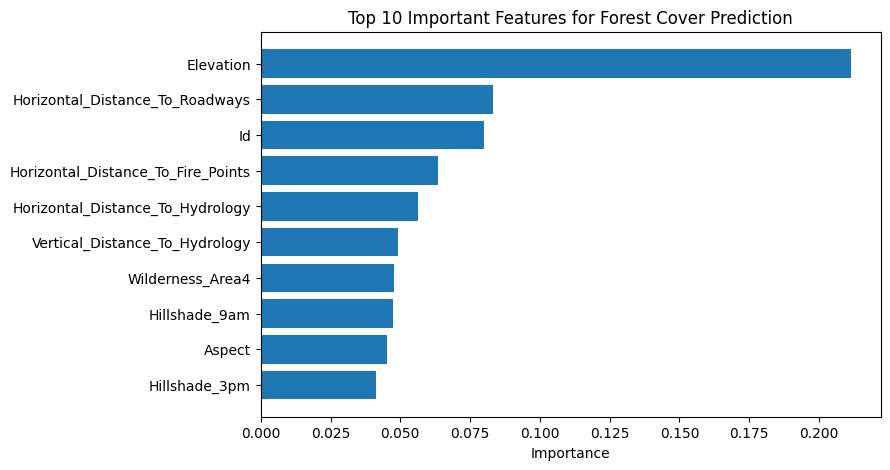

In [19]:
plt.figure(figsize=(8,5))
plt.barh(
    feature_importance_df["Feature"].head(10),
    feature_importance_df["Importance"].head(10)
)
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.title("Top 10 Important Features for Forest Cover Prediction")
plt.show()


In [20]:
cover_type_mapping = {
    1: "Spruce/Fir",
    2: "Lodgepole Pine",
    3: "Ponderosa Pine",
    4: "Cottonwood/Willow",
    5: "Aspen",
    6: "Douglas-fir",
    7: "Krummholz"
}


In [21]:
sample_input = X.iloc[0].values.reshape(1, -1)
predicted_class = model.predict(sample_input)[0]
cover_type_mapping[predicted_class]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


'Aspen'

In [22]:
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)
